In [6]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [7]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "other"
dataset = "chameleon_t8_8k"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 120

## Loading benchmark dataset

In [8]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([7, 4, 5, 3, 6, 8, 2, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [9]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [10]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 2min 17s
Wall time: 2min 19s


## NBC-TI

In [11]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 1min
Wall time: 1min 1s


## NBC using sklearn.neighbors

In [12]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 250 ms
Wall time: 282 ms


## Comparison

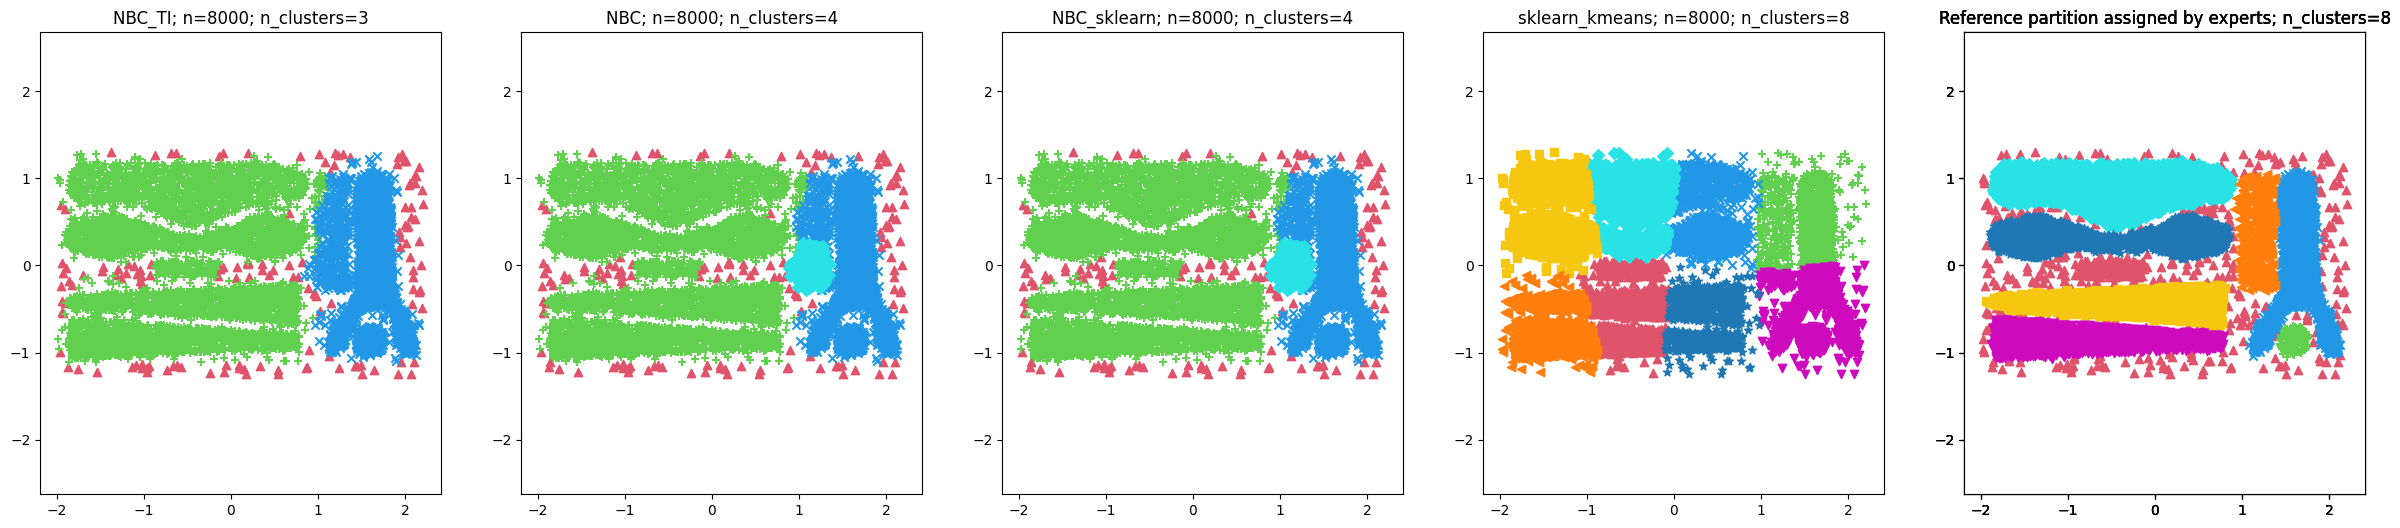

In [13]:
plot_results(benchmark.data, methods, results, reference)

In [14]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=120
╒════════════════════╤═════════════════════════╤═════════════════════════╤═════════════════════════════════════╕
│ NBC_TI             │ NBC                     │ NBC_sklearn             │ sklearn_kmeans                      │
│ [[ 140  330   51]  │ [[ 147  325   46    3]  │ [[ 147  325   46    3]  │ [[200  50  42  13  52  56  52  56]  │
│  [   0    0  181]  │  [   0    0  181    0]  │  [   0    0  181    0]  │  [  0   0   0   0 181   0   0   0]  │
│  [   1    0 1382]  │  [   1    0 1382    0]  │  [   1    0 1382    0]  │  [  0 692   0   0 691   0   0   0]  │
│  [   0 1451    0]  │  [   0 1451    0    0]  │  [   0 1451    0    0]  │  [  0   0 411 661   0 379   0   0]  │
│  [   0 1450    0]  │  [   0 1450    0    0]  │  [   0 1450    0    0]  │  [418   0   0   0   0   0 341 691]  │
│  [   2 1108    0]  │  [   2 1108    0    0]  │  [   2 1108    0    0]  │  [391   0   0   0   0   0 495 224]  │
│  [   0 1554    0]  │  [   0 1554    0    0]  │  [   0 1554    0    0

In [15]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=120
╒═══════════════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╕
│ NBC_TI                    │ NBC                       │ NBC_sklearn               │ sklearn_kmeans            │
│ ar: 0.20730240650075613   │ ar: 0.2119675131600828    │ ar: 0.2119675131600828    │ ar: 0.34471111029889145   │
│ r: 0.5448244468058507     │ r: 0.5522941305163145     │ r: 0.5522941305163145     │ r: 0.8396964620577572     │
│ fm: 0.5024987122815228    │ fm: 0.5038749870240167    │ fm: 0.5038749870240167    │ fm: 0.4397393895486852    │
│ afm: 0.2776006842178668   │ afm: 0.28198522030725864  │ afm: 0.28198522030725864  │ afm: 0.3475773437782549   │
│ mi: 0.5589600712571696    │ mi: 0.5962359670086386    │ mi: 0.5962359670086386    │ mi: 1.0824999874268728    │
│ nmi: 0.4382342179170307   │ nmi: 0.4559419151589973   │ nmi: 0.4559419151589973   │ nmi: 0.542193971697988    │
│ ami: 0.4378435256088546   │ ami: 0.45538595245641844  │ ami: 0.45538595